# Playing with Fourier Transforms

## Exploring frequency-based image compression

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as im

In [2]:
pic = np.asarray(im.open("photo.jpg").convert('LA'))[:,:,0]

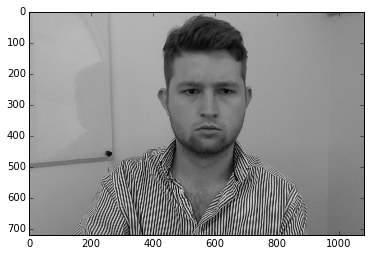

In [3]:
plt.imshow(pic, cmap=plt.cm.gray)


In [4]:
fft = np.fft.fft2(pic)

In [5]:
real = np.absolute(fft)

First, look at the big FFT. You can't see anything. But what if we zoom into the low frequency regions?

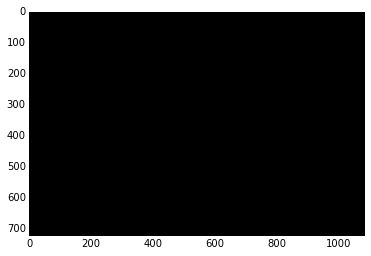

In [6]:
plt.imshow(real, cmap=plt.cm.gray)

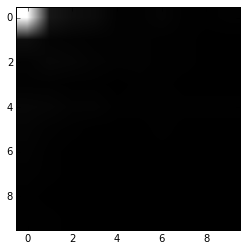

In [7]:
plt.imshow(real[0:10,0:10], cmap=plt.cm.gray)

Lots of DC!

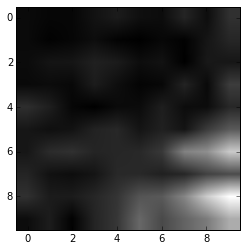

In [8]:
plt.imshow(real[-10:,-10:], cmap=plt.cm.gray)

Looks like the image is composed mostly of low frequencies...

Let's cut out all but the bottom 5% of frequencies in either direction. Instead of having a 720x1080 FFT, we only have two 36x54 FFTs. In other words, we've cut the image filesize by **99.5%!**

In [9]:
fraction = 0.1/2
(h,w) = fft.shape
(h2,w2) = (int(h*fraction), int(w*fraction))
fft2 = np.zeros(fft.shape, dtype=np.complex)
fft2[0:h2,0:w2] = fft[0:h2,0:w2]
fft2[-h2:,-w2:] = fft[-h2:,-w2:]
(h2*w2*2)/(h*w)

0.005

In [10]:
pic2 = np.absolute(np.fft.ifft2(fft2))

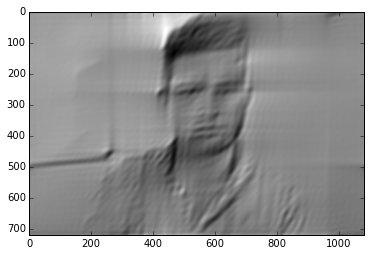

In [11]:
plt.imshow(pic2, cmap=plt.cm.gray)

Let's try to increase the contrast on the fft.

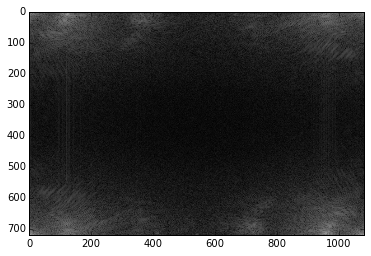

In [12]:
mag = np.abs(fft)
plt.imshow(np.log(mag+1000), cmap=plt.cm.gray)

Interesting. I'm guessing those vertical lines are my shirt at 10-20% of Nyquist. 

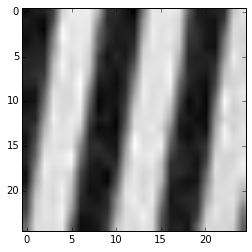

In [13]:
plt.imshow(pic[675:700,375:400], cmap=plt.cm.gray)

Yep, looks like it. Around 5px per stripe. Let's try erasing those.

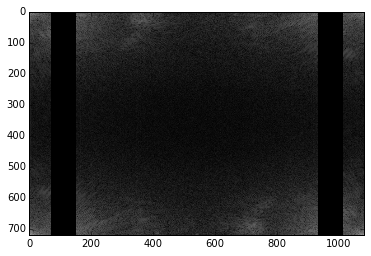

In [14]:
fft3 = fft.copy()
fft3[:,70:150] = 1
fft3[:,-150:-70] = 1
plt.imshow(np.log(np.abs(fft3)+1000), cmap=plt.cm.gray)

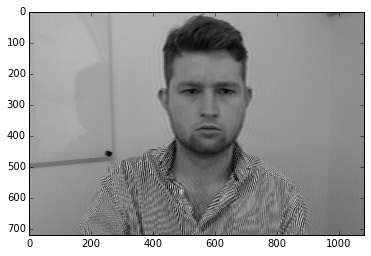

In [15]:
pic3 = np.abs(np.fft.ifft2(fft3))
plt.imshow(pic3, cmap=plt.cm.gray)

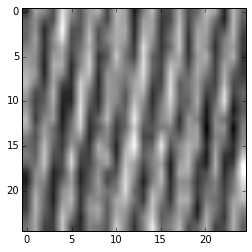

In [16]:
plt.imshow(pic3[675:700,375:400], cmap=plt.cm.gray)

We're only left with harmonics of my shirt! Let's nuke those.

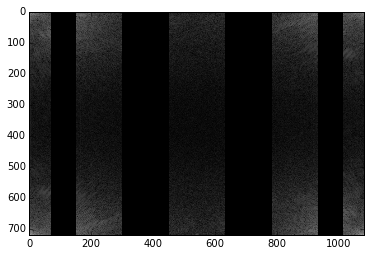

In [17]:
fft4 = fft.copy()
fft4[:,70:150] = 1
fft4[:,-150:-70] = 1
fft4[:,300:450] = 1
fft4[:,-450:-300] = 1
plt.imshow(np.log(np.abs(fft4)+1000), cmap=plt.cm.gray)

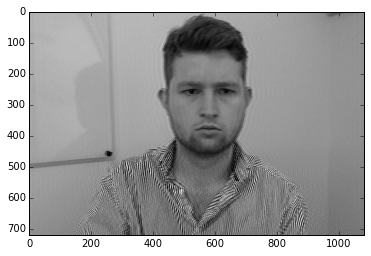

In [18]:
pic4 = np.abs(np.fft.ifft2(fft4))
plt.imshow(pic4, cmap=plt.cm.gray)

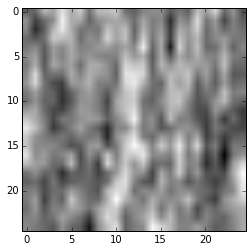

In [19]:
plt.imshow(pic4[675:700,375:400], cmap=plt.cm.gray)

Shirt stripes obliterated.